## HW15
Austin Placinto
I have neither given nor received any unauthorized aid in completing this work, nor have I presented someone else's work as my own.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Import Imagenet and check to make sure it's there

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Assign directories

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/gdrive/My Drive/vcc19'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

Create the model with the frozen imagenet on top.

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

Freeze imagenet

In [0]:
conv_base.trainable = False

Data augmentation for input & compilation

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255) # Just rescale. No DA

train_generator = train_datagen.flow_from_directory( 
        train_dir,              # This is the target directory
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=2,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator, # augmented images are fed
      steps_per_epoch=50,
      epochs=10,
      validation_data=validation_generator, # No DA
      validation_steps=20,
      verbose=2)

Found 1300 images belonging to 13 classes.
Found 286 images belonging to 13 classes.
Epoch 1/10
 - 30s - loss: 1.7872 - acc: 0.4500 - val_loss: 1.6872 - val_acc: 0.4500
Epoch 2/10
 - 29s - loss: 1.8322 - acc: 0.4200 - val_loss: 1.5128 - val_acc: 0.7000
Epoch 3/10
 - 29s - loss: 1.8774 - acc: 0.4100 - val_loss: 1.7353 - val_acc: 0.4000
Epoch 4/10
 - 29s - loss: 1.7843 - acc: 0.4500 - val_loss: 1.7858 - val_acc: 0.4000
Epoch 5/10
 - 29s - loss: 1.7564 - acc: 0.4700 - val_loss: 1.4267 - val_acc: 0.7500
Epoch 6/10
 - 29s - loss: 1.7650 - acc: 0.4500 - val_loss: 1.6122 - val_acc: 0.4500
Epoch 7/10
 - 29s - loss: 1.6576 - acc: 0.5500 - val_loss: 1.8091 - val_acc: 0.4000
Epoch 8/10
 - 29s - loss: 1.8182 - acc: 0.4500 - val_loss: 1.4805 - val_acc: 0.6500
Epoch 9/10
 - 29s - loss: 1.5260 - acc: 0.5700 - val_loss: 1.4977 - val_acc: 0.5500
Epoch 10/10
 - 29s - loss: 1.6730 - acc: 0.5100 - val_loss: 1.5248 - val_acc: 0.5500


Plot results

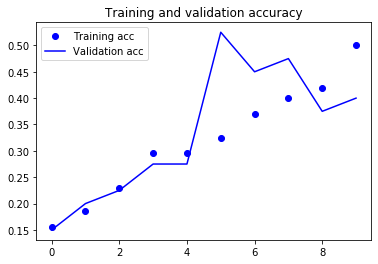

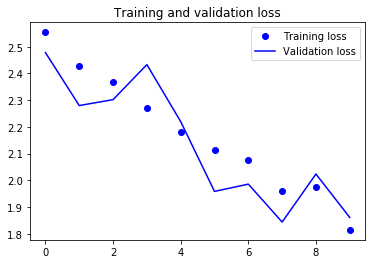

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As can be seen above, the model produces 100% accuracy for determining shapes from the file.

In [0]:
model.save('/gdrive/My Drive/Colab Notebooks/h5s/HW15.h5')

Save model.